In [1]:
import requests
import time
import pandas as pd
from tqdm.notebook import tqdm
from json import JSONDecodeError
import networkx
from matplotlib import pyplot as plt

In [3]:
# получаем полный список групп пользователя
def get_user_groups(user_id):
    url = 'https://api.vk.com/method/groups.get'
    # сколько групп выводить за 1 запрос
    count = 100
    # предварительное количество групп у пользователя, точное будет получено после запроса
    count_groups = 101
    offset = 0
    params = {
        "v":5.103,
        "access_token":access_token,
        "user_id":user_id,
        "count":count,
        "offset":offset
    }
    items = []
    while offset<=count_groups:
        time.sleep(0.35)
        params.update({"offset":offset})
        try:
            json_response = requests.get(url, params=params).json()
            count_groups = json_response["response"]["count"]
            new_items = (json_response["response"]["items"])
            items.extend(new_items)
        except KeyError:
#             print(json_response)
            pass

        offset = offset + count
    return items

In [4]:
# получить информацию о группах, не более 500 групп за запрос
def get_groups_info(groups_list):
    url = 'https://api.vk.com/method/groups.getById'
    # сколько групп выводить за 1 запрос
#     count = 100
    # предварительное количество групп у пользователя, точное будет получено после запроса
    count_groups = 10000
    offset = 0
    params = {
        "v":5.103,
        "access_token":access_token,
        "group_ids": ','.join(map(str,groups_list)),
        "fields": "members_count",
    }
#     response = requests.get(url, params=params)
    response = requests.post(url, params=params)
    try:
        json_response = response.json()
    except JSONDecodeError:
        print(response)
        
    return json_response['response']

In [5]:
# получить список друзей вконтакте
def get_friends_ids(user_id):
    url = 'https://api.vk.com/method/friends.get' 
    params = {
        "v":5.103,
        "access_token":access_token,
        "user_id":user_id,
        "fields":"city"
    }

    json_response = requests.get(url, params=params).json()
    
    if json_response.get('error'):
        print(json_response.get('error'))
        return [], []
    return [item["id"] for item in json_response['response']["items"]], [item["first_name"] + " " + item['last_name'] for item in json_response['response']["items"]]

In [6]:
def get_user_names(users_list):
    url = 'https://api.vk.com/method/users.get'
    # сколько групп выводить за 1 запрос
    #     count = 100
    # предварительное количество групп у пользователя, точное будет получено после запроса
    count_groups = 10000
    offset = 0
    params = {
        "v":5.103,
        "access_token":access_token,
        "user_ids": ','.join(map(str,users_list))
    }
    #     response = requests.get(url, params=params)
    response = requests.post(url, params=params)
    try:
        json_response = response.json()
    except JSONDecodeError:
        print(response)

    return {item["id"]:item["first_name"] + " " + item['last_name'] for item in json_response['response']}

In [7]:
# получаем полный список участников группы
def get_group_members(group_id):
    url = 'https://api.vk.com/method/groups.getMembers'
    # сколько групп выводить за 1 запрос
    count = 1000
    # предварительное количество групп у пользователя, точное будет получено после запроса
    count_members = 1001
    offset = 0
    params = {
        "v":5.103,
        "access_token":access_token,
        "group_id":group_id,
        "count":count,
        "offset":offset
    }
    items = []
    while offset<=count_members:
        time.sleep(0.35)
        params.update({"offset":offset})
        json_response = requests.get(url, params=params).json()
#         print(json_response)
        try:
            count_members = json_response["response"]["count"]
            new_items = (json_response["response"]["items"])
            items.extend(new_items)
        except KeyError:
#             print(json_response)
            pass
        offset = offset + count
    return items

## Проведем анализ подгрупп

In [8]:
# получаем список подписчиков маркетплейса

In [9]:
tea_ru_members = get_group_members(186570815)

In [100]:
# tea_ru_members = get_friends_ids(7521390)

In [118]:
# составим список друзей для членов нашего сообщества
# graph = {}
names = {}
for friend_id in tea_ru_members:
    if len(graph.get("friend_id",[]))>0:
        continue
    if friend_id<464394732:
        continue
    print('Processing id: ', friend_id)
    time.sleep(1)
    graph[friend_id], names[friend_id] = get_friends_ids(friend_id)

Processing id:  464394732
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'v', 'value': '5.103'}, {'key': 'user_id', 'value': '464394732'}, {'key': 'fields', 'value': 'city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Processing id:  467692843
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'v', 'value': '5.103'}, {'key': 'user_id', 'value': '467692843'}, {'key': 'fields', 'value': 'city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Processing id:  468198989
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'v', 'value': '5.103'}, {'key': 'user_id', 'value': '468198989'}, {'key': 'fields', 'value': 'city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Processing id:  469259010
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'v', 'value': '5.1

Processing id:  576022389
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'v', 'value': '5.103'}, {'key': 'user_id', 'value': '576022389'}, {'key': 'fields', 'value': 'city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Processing id:  578776271
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'v', 'value': '5.103'}, {'key': 'user_id', 'value': '578776271'}, {'key': 'fields', 'value': 'city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Processing id:  581882892
Processing id:  582828091
Processing id:  583302659
{'error_code': 30, 'error_msg': 'This profile is private', 'request_params': [{'key': 'v', 'value': '5.103'}, {'key': 'user_id', 'value': '583302659'}, {'key': 'fields', 'value': 'city'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Processing id:  588764399
{'error_code': 18, 'error_msg': 'User was deleted or

In [119]:
# сохраним спарсенные результаты
import pickle
with open('friends_of_group.pickle', 'wb') as f:
    pickle.dump(graph, f)
# with open('friends_of_group.pickle', 'rb') as f:
#     graph = pickle.load(f)

In [120]:
# соберем граф друзей
g = networkx.Graph(directed=False)
for i in graph:
    if len(graph[i])>0:
#         g.add_node(i)
        for j in graph[i]:
            if i != j and i in tea_ru_members and j in tea_ru_members:
                g.add_edge(i, j)

# pos=networkx.drawing.nx_agraph.graphviz_layout(g,prog="neato")

In [121]:
# оценим количество доступных записей (не скрыт профиль)
grapg_stat = [1 if len(graph[key])>0 else 0  for key in graph.keys()]
print(len(grapg_stat), sum(grapg_stat))

505 351


In [122]:
# соберем словарик имен
from itertools import chain
names_dict = {}
# for key, name in chain(*[list(zip(graph[key],names[key])) for key in graph]):
#     names_dict.update({key: name})

In [123]:
# дополним справочник именами тех, чьи имена недоступны через список друзей
_ = get_user_names([node for node in g.nodes if node not in names_dict.keys()])
names_dict.update(_)

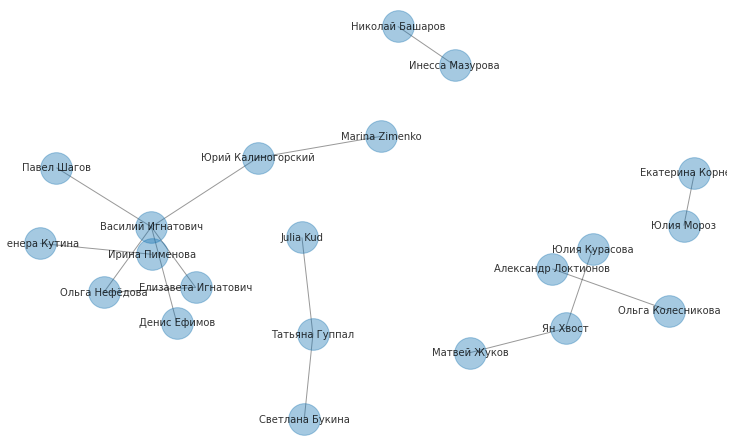

In [126]:
plt.figure(figsize=(10,6))
pos = networkx.spring_layout(g, k=0.6)  
# pos = networkx.spring_layout(g)  
networkx.draw(g, pos, node_size=1000, with_labels=False, width=1, alpha =0.4)
networkx.draw_networkx_labels(g,pos, {n:lab for n,lab in names_dict.items() if n in pos},font_size=10, alpha =0.8);

In [127]:
# оценим наиболее значимых участников сети друзей
from operator import itemgetter
_ = dict(networkx.degree(g))
{names_dict[key]: value for key, value in list(sorted(_.items(), key = itemgetter(1), reverse = True)[:5]) }

{'Василий Игнатович': 5,
 'Юрий Калиногорский': 2,
 'Татьяна Гуппал': 2,
 'Елизавета Игнатович': 2,
 'Ольга Нефёдова': 2}

In [67]:
networkx.write_graphml(g, 'graph.graphml')

## Анализ смежности групп

In [74]:
%%time
# with open('common_groups_members8.pickle', 'rb') as f:
#     common_groups_members = pickle.load(f)
with open('weighs_matrix.pickle', 'rb') as f:
    weighs_matrix = pickle.load(f)
with open('members_count.pickle', 'rb') as f:
    members_count = pickle.load(f)

Wall time: 19.9 ms


In [75]:
# всего смежных групп 605

In [76]:
# вошли в анализ
common_groups_list = list(set(chain(*list((weighs_matrix.keys())))))
len(common_groups_list)

103

In [77]:
group_names_dict = {k["id"]:k["name"] for k in get_groups_info(common_groups_list)}

In [78]:
# members_count = {x:len(common_groups_members[x]) for x in common_groups_list}
# with open('members_count.pickle', 'wb') as f:
#     pickle.dump(members_count, f)

In [79]:
# max_matrix = max(weighs_matrix.values())
# min_matrix = min(weighs_matrix.values())

# for i in weighs_matrix:
#     weighs_matrix[i] = (weighs_matrix[i] - min_matrix) / (max_matrix - min_matrix)

In [80]:
g = networkx.Graph(directed=False)
for i in common_groups_list:
    for j in common_groups_list:
        if i > j:
            g.add_edge(i, j, weight=weighs_matrix[(i,j)])
            
# members_count = {x:len(common_groups_members[x]) for x in common_groups_list}

max_value = max(members_count.values()) * 1.0
size = []
max_size = 1000
min_size = 10
for node in g.nodes():
    size.append(((members_count[node]/max_value)*max_size + min_size)*10)

Text(0.5, 1.0, 'Карта взаимосвязей групп ВК')

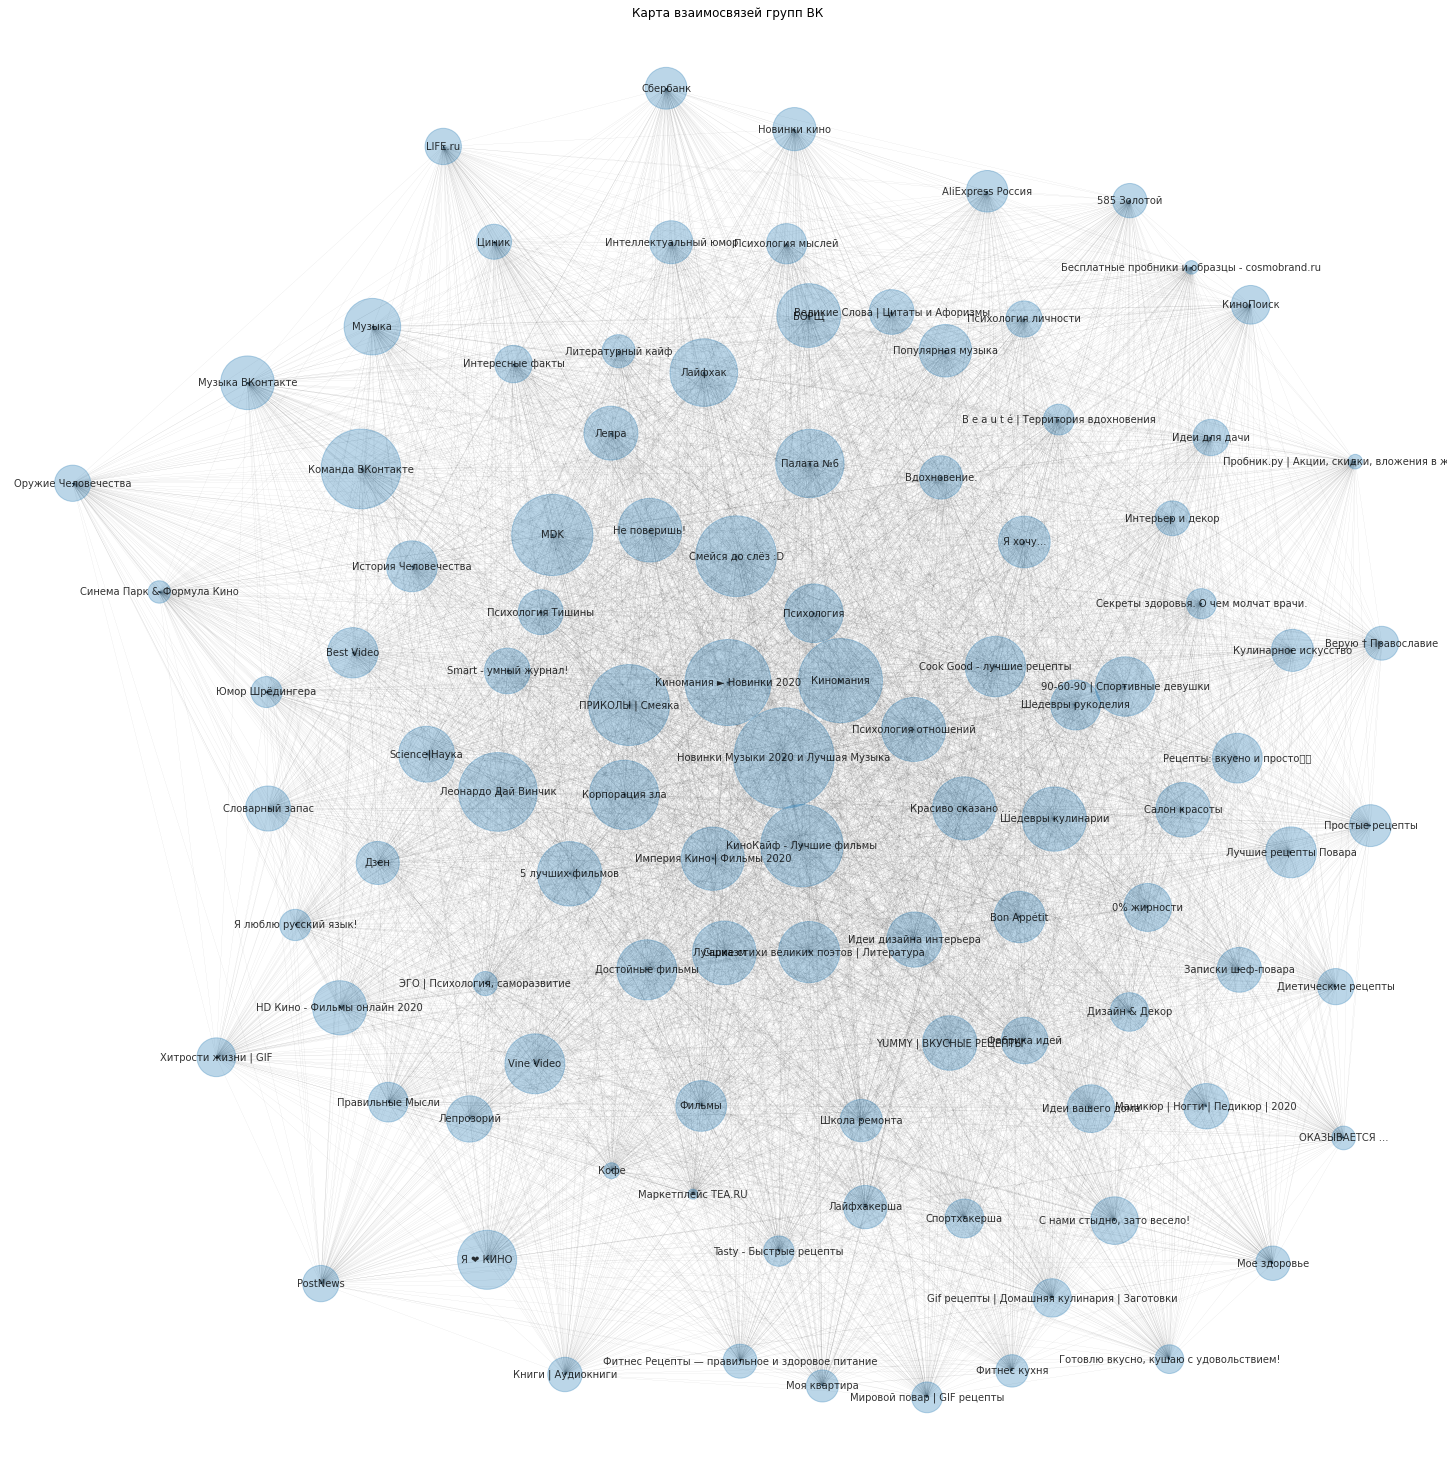

In [81]:
plt.figure(figsize=(20,20))
pos = networkx.spring_layout(g)  
# pos = networkx.spring_layout(g)  
networkx.draw(g, pos, node_size=size, with_labels=False, width=0.1, alpha=0.3)
networkx.draw_networkx_labels(g,pos, {n:lab for n,lab in group_names_dict.items() if n in pos},font_size=10, alpha =0.8);
plt.title("Карта взаимосвязей групп ВК");

In [103]:
# построим инструмент для поиска близких групп
from operator import itemgetter
def closest_n_to(group_id, n=30):
    _ = {k[1]:weighs_matrix[k] for k in weighs_matrix.keys() if group_id in k}
    __ = {key: value for key, value in list(sorted(_.items(), key = itemgetter(1), reverse = True)[:n]) }
    return{str(key)+ "-" + group_names_dict[key]:int(value*505) for key, value in __.items()}

In [104]:
closest_n_to(186570815, 10)

{'38912380-Кофе': 189,
 '27895931-Новинки Музыки 2020 и Лучшая Музыка': 118,
 '43215063-Киномания ► Новинки 2020': 101,
 '39009769-Cook Good - лучшие рецепты': 91,
 '36184135-Идеи дизайна интерьера': 90,
 '48319873-Империя Кино | Фильмы 2020': 90,
 '113071474-Я ❤ КИНО': 89,
 '55662720-Психология': 84,
 '40498005-Психология отношений': 84,
 '35486195-0% жирности': 83}

In [105]:
closest_n_to(38912380, 10)

{'38683579-Лучшие стихи великих поэтов | Литература': 137,
 '27895931-Новинки Музыки 2020 и Лучшая Музыка': 134,
 '36184135-Идеи дизайна интерьера': 105,
 '22798006-Киномания': 98,
 '32194285-Bon Appétit': 95,
 '35486195-0% жирности': 94,
 '33769500-Достойные фильмы': 93,
 '36164349-Сарказм': 92,
 '26750264-5 лучших фильмов': 90,
 '29559271-Science|Наука': 89}

In [107]:
closest_n_to(39009769, 10)

{'35486195-0% жирности': 167,
 '32439535-Идеи вашего дома': 156,
 '32194285-Bon Appétit': 153,
 '34889014-Диетические рецепты': 148,
 '39009769-Cook Good - лучшие рецепты': 143,
 '18464856-Лучшие рецепты Повара': 135,
 '27531145-B e a u t é | Территория вдохновения': 128,
 '27895931-Новинки Музыки 2020 и Лучшая Музыка': 127,
 '38379853-Школа ремонта': 118,
 '38912380-Кофе': 109}

# Выводы и идеи:
инструмент поможет: 
* выбрать группы для продвижения
* подстроить наш контент под интересы читателей
* использовать сценарии потребления для продвижения продуктов

* (фильмы, литература) 
* (рецепты) 
* (диеты)
* (дом, уют)
* (забота)

In [190]:
# common_groups_members = {}
# for group in tqdm(common_groups[:]):
#     common_groups_members[group[0]] = get_group_members(group[0])

In [57]:
for key in tqdm(common_groups_members.keys()):
    if len( common_groups_members[key] )==0:
        common_groups_members[key] = get_group_members(key)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))